# Race Logs

This notebook is used to view, update, and manage the set of race/sail instrument logs collected on Peer Gynt using the Raspberry Pi.

Information about the race logs are collected into a Pandas dataframe (which is much like a database).  Why not use a database?  Because then we can share "know how" and some tools.

## Goals

- View the list of all logs and inspect for accuracy.
    - Correct errors
- Update and add a new log
- Add meta data (like race start/end)
- View race data.

## TODO

- Add additional metadata for each race.  Some extracted automatically?
   - Tenet: this data should be user entered, not automatic.  Automatic goes in a separate table?
   - Conditions.  Crew.  Settings for rig.
   - Speed. Quality of maneuvers.
- How to edit more complex and longer text fields.
- How to handle multiple races in one log??
   - Split into different files?
- Make it faster to show the race track.


In [1]:
%matplotlib notebook

import os
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qgrid

# These are libraries written for RaceAnalysis
import global_variables
G = global_variables.init_seattle()
import race_logs
import process as p
import analysis as a
import chart as c
import utils

In [2]:
# Info about the race logs are stored in a DataFrame.
log_info = race_logs.read_log_info()

# The data in this table can be editted using a QGrid Control.  Click on the column header to sort.  Click again 
# to sort in a different order.  Double click on a cell to edit.
w = qgrid.show_grid(log_info, show_toolbar=True)
w


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [3]:
# If you do update the table shown above, then this will save the changes (which are not saved by default)

if False:  # False for now.
    log_info = w.get_changed_df()
    race_logs.save_updated_log_info(log_info)

In [4]:
# Check to see if there are newly collected logs.  The log files will exist, but there will be 
# no corresponding rows.

missing_files = race_logs.find_new_logs(log_info)
print("Here are a list of files which are missing from the log_info table.")
missing_files

Here are a list of files which are missing from the log_info table.


[]

In [5]:
# Load each of the new log files.

if len(missing_files) > 0:
    # Load these new log files
    new_dfs = []
    for file in missing_files:
        print(f"Loading {file}")
        ndf = race_logs.read_log(file, discard_columns=True, skip_dock_only=False, trim=True, path=G.LOGS_DIRECTORY, cutoff=0.3)
        ndf.filename = file
        new_dfs.append(ndf)

    # As a convenience combine the new logs into one large DataFrame
    bdf =  pd.concat(new_dfs, sort=True, ignore_index=True)

In [6]:
# Display each new race log on a map, to jog your memory.

if len(missing_files) > 0:

    # Create a chart that can contain all the tracks.
    chart = c.plot_chart(bdf)

    # Plot each in a different color.
    for df, color in zip(new_dfs, it.cycle("red green blue brown grey".split())):
        print(f"Displaying in {df.filename} in {color}")
        c.draw_track(df, chart, color=color)


In [7]:
# Display the newly modified table, and perhpas edit to fill in missing info.

if len(missing_files) > 0:
    new_log_info = race_logs.add_log_info_rows(log_info, missing_files)        
   
    # The data in this table can be editted using a QGrid Control.  Double click on a cell to edit.
    w = qgrid.show_grid(new_log_info, show_toolbar=True)
    w

In [8]:
# Save the new table.
if len(missing_files) > 0:

    log_info = w.get_changed_df()
    race_logs.save_updated_log_info(log_info)


In [9]:
log_info

,file,race,begin,end,datetime,description
1,2020-02-08_10:23.pd.gz,Snowbird #4,32000,130010,2020-02-08 10:23:00-08:00,Snowbird #4.
0,2020-01-25_14:23.pd.gz,STYC Iceberg,0,-1,2020-01-25 14:23:00-08:00,"Lot's of wind was predicted, but we got little..."
17,2020-01-18_10:50.pd.gz,,0,-1,2020-01-18 10:50:00-08:00,Practice
2,2019-12-07_09:47.pd.gz,Snowbird #2,54316,109378,2019-12-07 09:47:00-08:00,Snowbird #2.
3,2019-12-06_11:25.pd.gz,,0,-1,2019-12-06 11:25:00-08:00,"Short, at dock."
4,2019-11-29_12:54.pd.gz,,0,-1,2019-11-29 12:54:00-08:00,Longer. At dock for data collection.
5,2019-11-24_10:33.pd.gz,,0,-1,2019-11-24 10:33:00-08:00,Practice.
6,2019-11-23_10:23.pd.gz,,0,-1,2019-11-23 10:23:00-08:00,Practice.
7,2019-11-16_10:09.pd.gz,Snowbird #1,41076,111668,2019-11-16 10:09:00-08:00,Snowbird #1.
8,2019-11-07_12:46.pd.gz,,0,-1,2019-11-07 12:46:00-08:00,"Short, at dock."


In [10]:
import importlib
importlib.reload(c)

<module 'chart' from '/Users/viola/GDriveBV/Sailboat/Code/Python/sailing/chart.py'>

## Quick Visualization Interface

Below we have added a bit of additional functionality to the qgrid interface:  When you select a row, that race track will be shown automatically.

Note, it takes a second (or two) between selecting a row and the display.  Its one of the only things that are a bit slow.

<IPython.core.display.Javascript object>


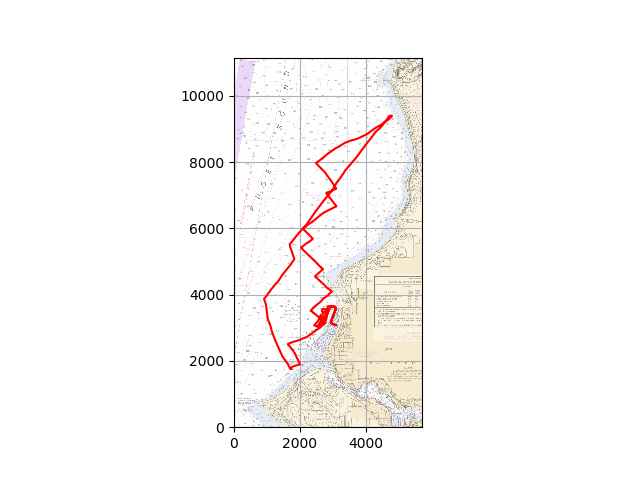

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

displaying file: 2020-02-08_10:23.pd.gz
Session from 2020-02-08 18:23:28.070000, 141790 rows, 4.152222222222222 hours.
displaying file: 2019-12-07_09:47.pd.gz
Session from 2019-12-07 17:47:04, 124084 rows, 3.4466666666666668 hours.
displaying file: 2019-11-24_10:33.pd.gz
Session from 2019-11-24 18:33:40.090000, 100821 rows, 2.8008333333333333 hours.
displaying file: 2019-11-16_10:09.pd.gz
Session from 2019-11-16 18:09:15.020000, 128865 rows, 3.5797222222222222 hours.


In [12]:
# create a function that is called "back" when a row is selected
def show_helper(row_num):
    "Display the race track from the ROW_NUM row, by position."
    file = log_info.iloc[row_num].file
    print(f"displaying file: {file}")
    df = race_logs.read_log_file(file, discard_columns=True, skip_dock_only=False, trim=True, path=G.LOGS_DIRECTORY, cutoff=0.3)
    chart = c.plot_chart(df, fig_or_num=fig)
    c.draw_track(df, chart, color='red')  

def show(args, _):
    # Args are a bit obscure
    row_num = args['new'][0]  # The newly selected row numbers, selected the first
    show_helper(row_num)

fig = plt.figure()
w = qgrid.show_grid(log_info, show_toolbar=True)
display(w)

# Display one of the races.
show_helper(0)

# Bind the callback
w.on('selection_changed', show)
